In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Part 1: Understanding the dataset

1.1. [1 point] Why are you interested in this dataset?
We are interested in this dataset because it has applications in criminology and, it seems like it has a lot of real world use. It also seems like it would be a complex dataset and would challenge our models.

1.2. [1 point] How many numerical attributes and categorical attributes are there in the dataset?
There are 10 continuous numerical attributes and no categorical attributes.

1.3. [2 point] Are there any missing values in numerical attributes? If so, how are you going to
handle them? (Are you going to remove all data instances with missing values?) Will all
attributes with missing values be removed? Will missing values be imputed? If so, how?

There are no missing attributes in this dataset

1.4. Before doing any analysis, answer the following questions.

1.4.1. [1 point] Why do you think clusters will be present in this dataset?
Different types of glass have different many different attributes that can help investigators decide what the type of glass is. This led us to believe that if a person can do it a data mining technique must be able to pull out the clusters that describe each different type of glass.

1.4.2. [1 point] Why might finding clusters in this dataset be helpful? (How might this help us to
understand or analyze data?)
Finding clusters in this data could help criminal investigators find out what type of glass they found in a crime scene as well as helping them find out where the glass came from. Clusters could also help us decide if different types of glass are similar to each other.

1.4.3. [1 point] How many clusters do you expect to see in this dataset? You can provide a range
of values for this question. (Ex: 2-5). Why do you expect to see this number of clusters in
this dataset?
We expect to see 5-7 different clusters in this dataset because in the dataset description, it states that there are 7 different types of glass in this dataset.

1.4.4. [2 point] Do you expect to see clusters of similar size? Why or why not?
We do not expect to se similar size clusters because there are not even numbers of instances of each glass type in this dataset.

Part 2

KMeans Clustering

In [2]:
def k_means_cluster(train_data, num_clusters, epsilon):
    num_features = train_data.shape[1]
    centroids = np.empty((int(num_clusters), num_features))
    for feature_index in range(num_features):
        max_val = np.max(train_data[:, feature_index])
        min_val = np.min(train_data[:, feature_index])
        for centroid_index in range(centroids.shape[0]):
            centroids[centroid_index][feature_index] = np.random.uniform(min_val, max_val)

    total_diff = 10
    while total_diff > epsilon:

        total_diff = 0

        centroid_assignments = np.zeros(train_data.shape[0], dtype=float)

        centroid_assignment = 0

        for entry_index in range(train_data.shape[0]):
            for centroid_index in range(centroids.shape[0]):
                
                
                if np.linalg.norm(train_data[entry_index] - centroids[centroid_index]) < np.linalg.norm(train_data[entry_index] - centroids[centroid_assignment]):
                    centroid_assignment = centroid_index
            centroid_assignments[entry_index] = centroid_assignment

        for centroid_index in range(centroids.shape[0]):

            centroid_ave = np.zeros(centroids.shape[1])
            counter = 0

            for entry_index in range(train_data.shape[0]):
                if centroid_assignments[entry_index] == centroid_index:
                    if counter > 0:
                        centroid_ave = centroid_ave + train_data[entry_index]
                        counter += 1
                    else:
                        centroid_ave = train_data[entry_index]
                        counter += 1

            if counter == 0:
                centroid_ave = centroids[centroid_index]
            else:
                centroid_ave = centroid_ave / counter

            total_diff += np.linalg.norm(centroid_ave - centroids[centroid_index])

            centroids[centroid_index] = centroid_ave
        # print(total_diff)
    # return centroids
    
    labels = []
    
    for data_point in train_data:
        
        min_distance = np.inf
        current_label = np.inf
        
        for centroid_idx in range(len(centroids)):
            
            distance = np.linalg.norm(centroids[centroid_idx] - data_point) 
            
            if distance < min_distance:
                current_label = centroid_idx
                min_distance = distance
                
        labels.append(current_label)
        
    return labels, centroids
                

In [10]:
def get_neighbors(data, point_idx, epsilon):
    neighbors = []
    for i, other_point in enumerate(data):
        if np.linalg.norm(data[point_idx] - other_point) <= epsilon:
            neighbors.append(i)
    return neighbors

def density_connected(data, labels, idx, cluster_id, epsilon, core_points):
    neighbors = get_neighbors(data, idx, epsilon)
    for neighbor in neighbors:
        if labels[neighbor] == 0:
            labels[neighbor] = cluster_id
            if neighbor in core_points:
                density_connected(data, labels, neighbor, cluster_id, epsilon, core_points)

def dbscan(data, minpts, epsilon):
    n = len(data)
    cluster_id = 1
    core_points = []
    labels = [0] * n
    border_points = []
    
    for i in range(n):
        if len(get_neighbors(data, i, epsilon)) >= minpts:
            core_points.append(i)
        else:
            border_points.append(i)
            
    for idx in core_points:
        if labels[idx] == 0:
            cluster_id += 1
            labels[idx] = cluster_id
            density_connected(data, labels, idx, cluster_id, epsilon, core_points)
            
    noise_points = []
    
    for i in range(n):
        if labels[i] == 0:
            labels[i] = -1
            noise_points.append(i)
        elif i not in core_points and i in border_points:
            labels[i] = 0
            
    # -1 = noise, 0 = border, 1+ = core
    
    return labels, core_points, border_points, noise_points
        
            

Test DBSCAN

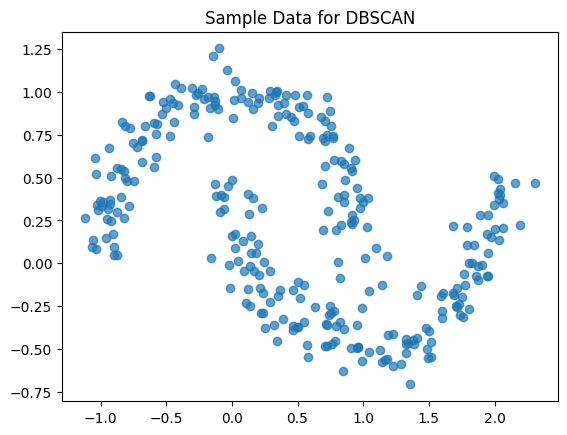

core points:  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227

C:\Users\josh.aney\AppData\Local\Temp\ipykernel_2692\449575142.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('viridis', len(unique_labels))


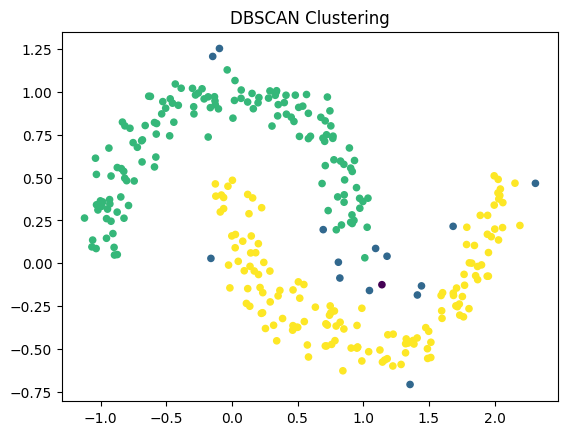

In [13]:
from sklearn.datasets import make_moons

X, _ = make_moons(n_samples=300, noise=0.1)

plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Sample Data for DBSCAN")
plt.show()

labels, core_points, border_points, noise_points = dbscan(X, minpts=5, epsilon=0.2)
print("core points: ", core_points)
print("border points: ", border_points)
print("noise points: ", noise_points)

unique_labels = np.unique(labels)

colormap = cm.get_cmap('viridis', len(unique_labels))
label_to_color = {label: colormap(i) for i, label in enumerate(unique_labels)}
colors = [label_to_color[label] for label in labels]

# Plot
plt.scatter(X[:, 0], X[:, 1], c=colors, s=20)
plt.title("DBSCAN Clustering")
plt.show()

Test KMEANS

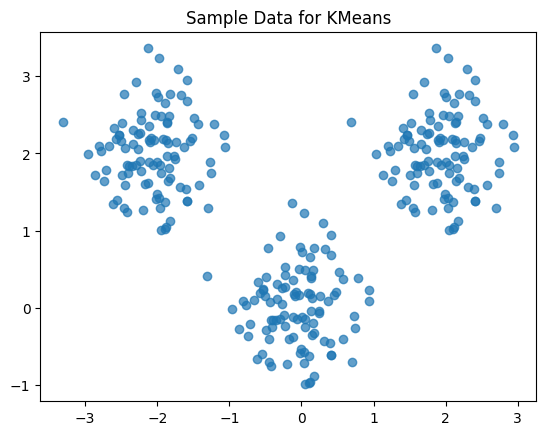

C:\Users\josh.aney\AppData\Local\Temp\ipykernel_50912\2296400642.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('viridis', len(unique_labels))


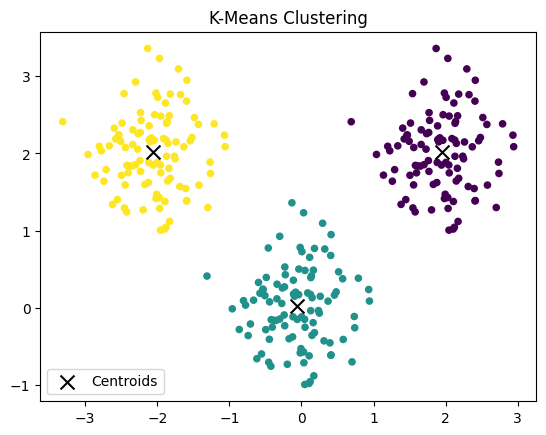

In [36]:
np.random.seed(42)
X = np.random.randn(100, 2) * 0.5
X = np.r_[X, X + [2, 2], X + [-2, 2]]

plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Sample Data for KMeans")
plt.show()

labels, centroids = k_means_cluster(X, 3, epsilon=0.1)
unique_labels = np.unique(labels)

# Build color map
colormap = cm.get_cmap('viridis', len(unique_labels))
label_to_color = {label: colormap(i) for i, label in enumerate(unique_labels)}
colors = [label_to_color[label] for label in labels]

# Plot
plt.scatter(X[:, 0], X[:, 1], c=colors, s=20)
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
plt.title("K-Means Clustering")
plt.legend()
plt.show()

In [91]:
def precision(labels, predictions):
    labels = np.array(labels)
    predictions = np.array(predictions)
    
    precisions = {}

    for cluster in np.unique(predictions):
        cluster_idxs = np.where(predictions == cluster)
        selected = labels[cluster_idxs]
        
        unique_true_labels, counts = np.unique(selected, return_counts=True)
        
        most_common_label = unique_true_labels[np.argmax(counts)]
        max_count = np.max(counts)
        
        precision_score = max_count / np.sum(counts)
        precisions[cluster] = precision_score
        
    
    average = sum(precisions.values()) / len(precisions)
    return average


In [92]:
predictions = [1, 1, 1, 1, 2, 2, 2, 2]
labels = [5, 2, 3, 4, 5, 4, 4, 4]
print(precision(labels, predictions))

0.5


Part 3
     1    2   3
1  [10    2   2
2  [0     0   6

     1    2
1  [10    4]
2  [0     6]